In [1]:
import warnings
warnings.filterwarnings('ignore')

# IMPORT LIBRARYS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# IMPORT FILE

In [3]:
data = pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

# CLEANING AND PRE-PROCESSING

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

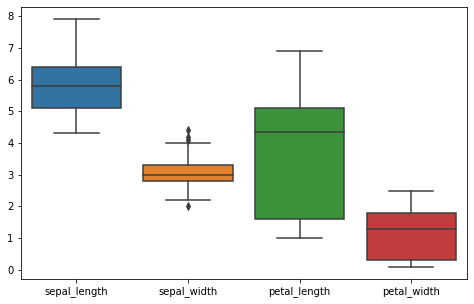

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data)
plt.show()

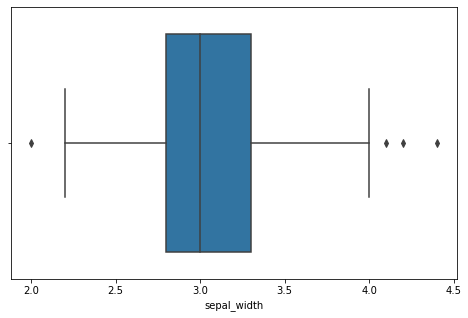

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x="sepal_width",data=data)
plt.show()

In [9]:
data = data[data['sepal_width'] <= 4]
data = data[data['sepal_width'] >2]

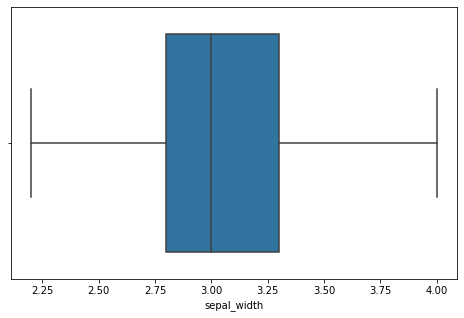

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x="sepal_width",data=data)
plt.show()

In [11]:
data.shape

(146, 5)

<AxesSubplot:xlabel='species', ylabel='count'>

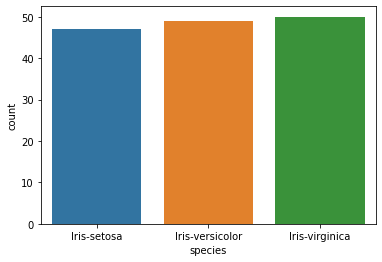

In [12]:
sns.countplot(x = "species", data = data)

# EXPLORATORY DATA ANALYTICS

In [13]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.036986,3.807534,1.219863
std,0.834093,0.395145,1.757117,0.760365
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


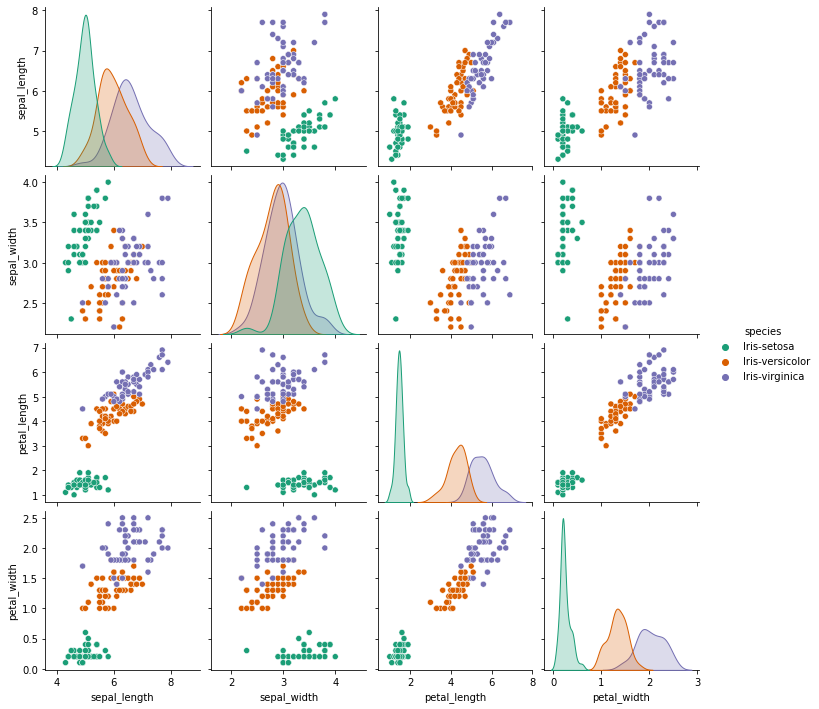

In [14]:
sns.pairplot(data = data, hue = 'species', kind='scatter', palette = 'Dark2')
plt.show()

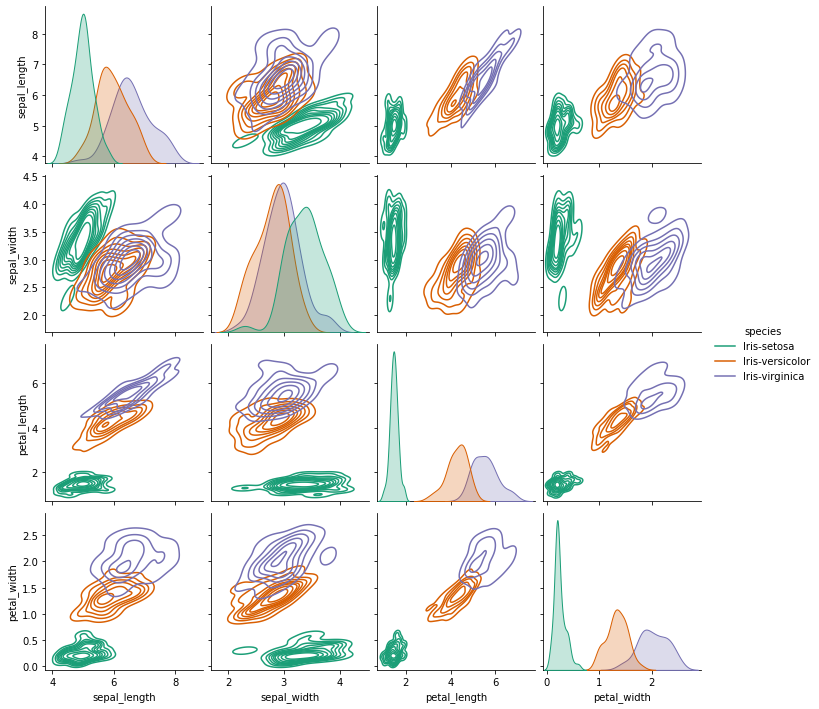

In [15]:
sns.pairplot(data = data, hue = 'species', kind='kde', palette = 'Dark2')
plt.show()

In [16]:
data = data.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0, 1, 2])
plt.show()

<AxesSubplot:>

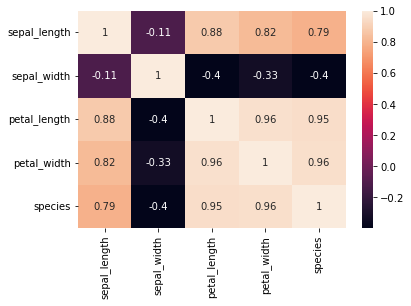

In [17]:
sns.heatmap(data.corr(), annot=True)

# SPLIT THE DATASET

In [18]:
x= data.drop('species', axis=1)
y = data['species']
print("Shape of X = ",x.shape)
print("Shape of Y = ",y.shape)

Shape of X =  (146, 4)
Shape of Y =  (146,)


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

print("Shape of X_train = ", x_train.shape)
print("Shape of X_test = ", x_test.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of y_test = ", y_test.shape)

Shape of X_train =  (102, 4)
Shape of X_test =  (44, 4)
Shape of y_train =  (102,)
Shape of y_test =  (44,)


# MODEL FITTING

In [20]:
DecisionTree = DecisionTreeClassifier()

DecisionTree.fit(x_train, y_train)
DecisionTree_score = DecisionTree.score(x_test, y_test)
DecisionTree_score

0.9545454545454546

In [21]:
KNN = KNeighborsClassifier()

KNN.fit(x_train, y_train)
KNN_score = KNN.score(x_test, y_test)
KNN_score

0.9772727272727273

In [22]:
svc = SVC(kernel='linear')

svc.fit(x_train, y_train)
svc_score = svc.score(x_test, y_test)
svc_score

0.9772727272727273

# PREDICTION MODEL AND ASSOCIATED SCORES

In [23]:
score_table = pd.DataFrame({"Test":['Decision Tree', 'KNN', 'Support Vector'], 
              "Score":[DecisionTree_score, KNN_score, svc_score]})
score_table

,Test,Score
0,Decision Tree,0.954545
1,KNN,0.977273
2,Support Vector,0.977273


# PREDICTION

In [24]:
DecisionTree_pred = DecisionTree.predict(x_test)
DecisionTree_pred

array([1, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 0],
      dtype=int64)

In [25]:
svc_pred = svc.predict(x_test)
svc_pred

array([1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 0],
      dtype=int64)

In [26]:
KNN_pred = KNN.predict(x_test)
KNN_pred

array([1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 0],
      dtype=int64)

# ACTUAL VALUE AND PREDICTED VALUE 

In [27]:
pred_table = pd.DataFrame({"Actual": y_test, "Decision Tree": DecisionTree_pred, "KNN":KNN_pred, 'Support Vector': svc_pred})
pred_table.head()

,Actual,Decision Tree,KNN,Support Vector
63,1,1,1,1
17,0,0,0,0
21,0,0,0,0
72,1,1,2,2
12,0,0,0,0
